In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [3]:
print('hello there')

data_src = "./football_data.csv"
df = pd.read_csv(data_src, )
df

hello there


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
weights = np.array(df[df['Weight'].notna()]['Weight'])
wg = [int(i[:-3]) for i in weights]
min(wg), max(wg)

(110, 243)

# Part 1
Plot histograms of count of players on the basis of some attributes like height.

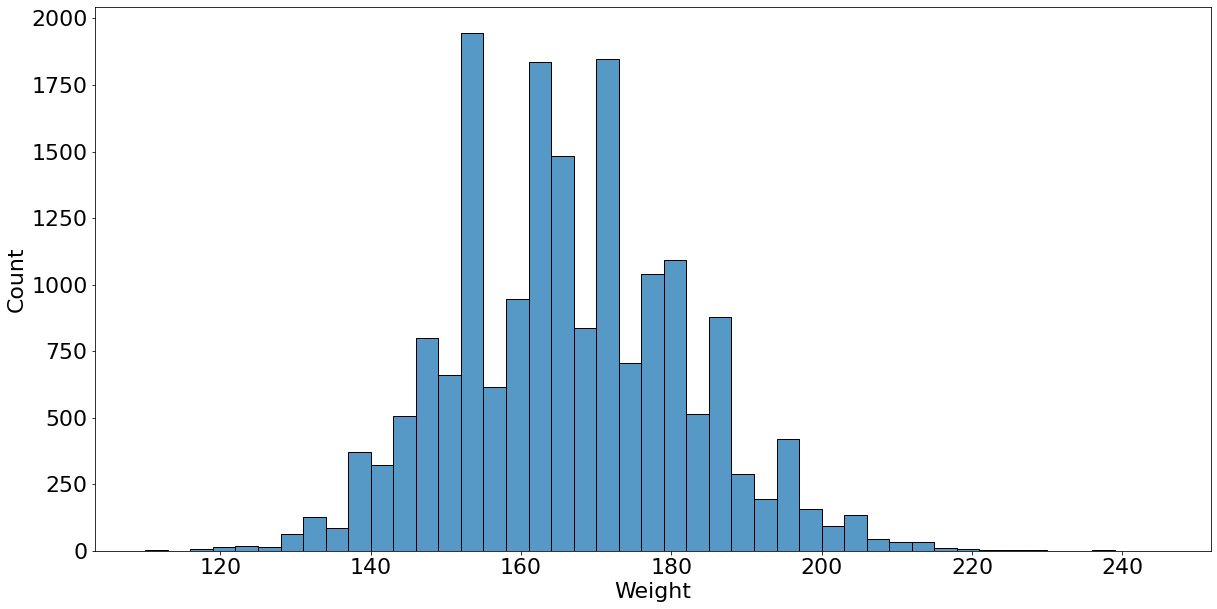

In [64]:
def correct_weight(w_str):
    return int(w_str[:-3])

df_new = df.copy()
df_new['Weight'] = df_new[df_new['Weight'].notna()]['Weight'].apply(correct_weight)
fig = plt.figure(figsize=(20,10))
sns.histplot(data=df_new, x='Weight', binwidth=3)
plt.show()

Above is a histogram of the count of players based on their Weights. Similarly, we can plot a histogram for attributes like [Overall, Position] as follows.

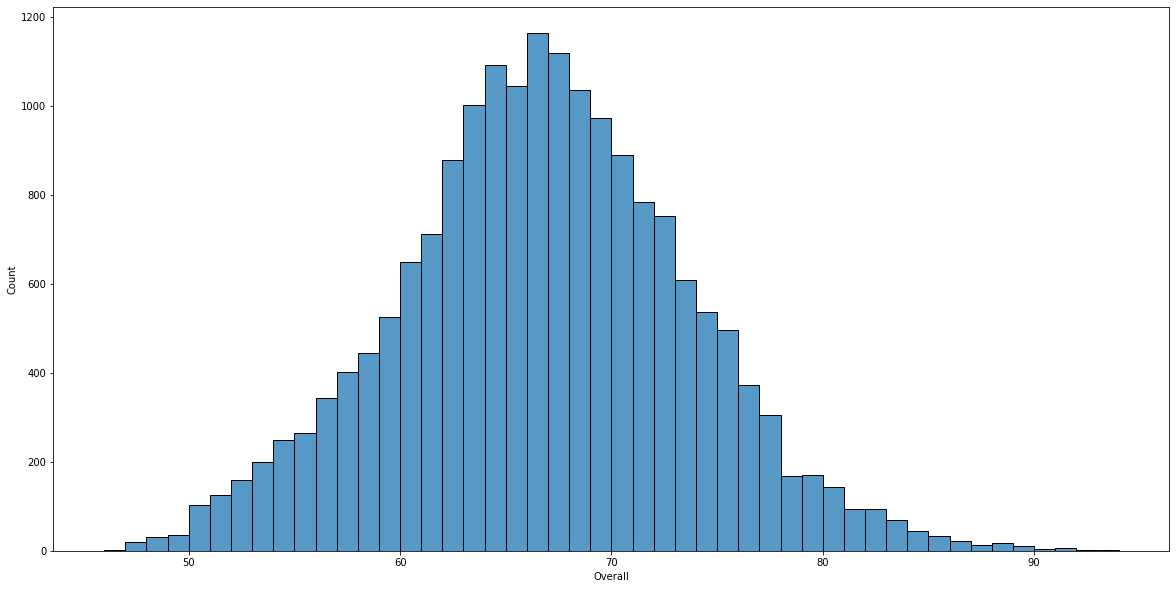

In [29]:
fig = plt.figure(figsize=(20,10))
sns.histplot(data=df_new, x='Overall', binwidth=1)
plt.show()

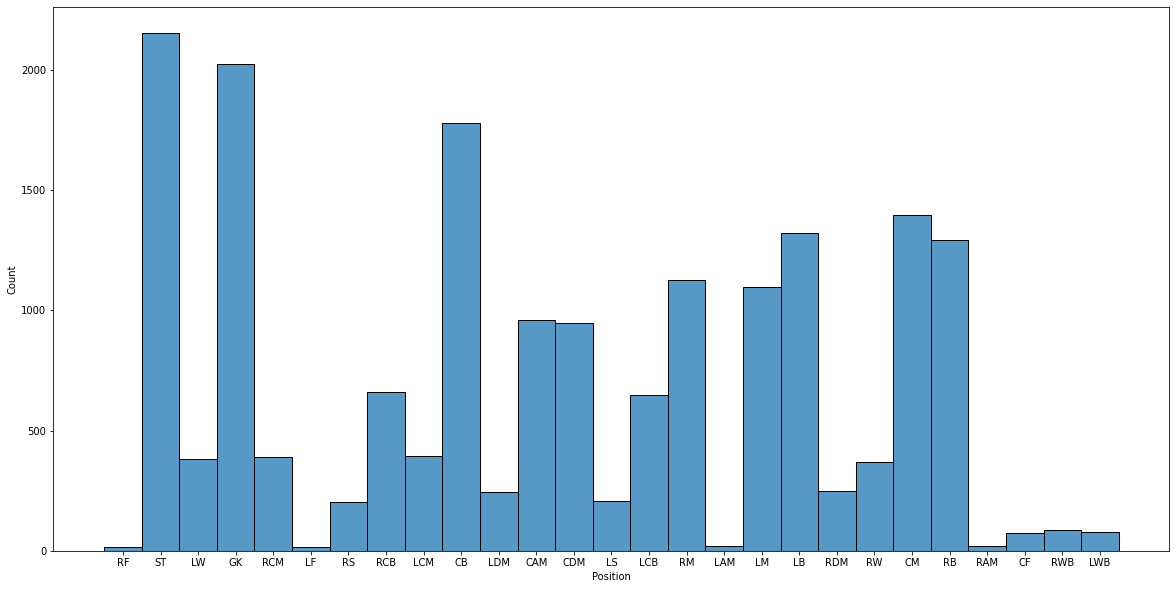

In [27]:
fig = plt.figure(figsize=(20,10))
sns.histplot(data=df_new, x='Position', binwidth=3)
plt.show()

# Part 2
Distribution of players in different clubs/country on the basis of some attribute.

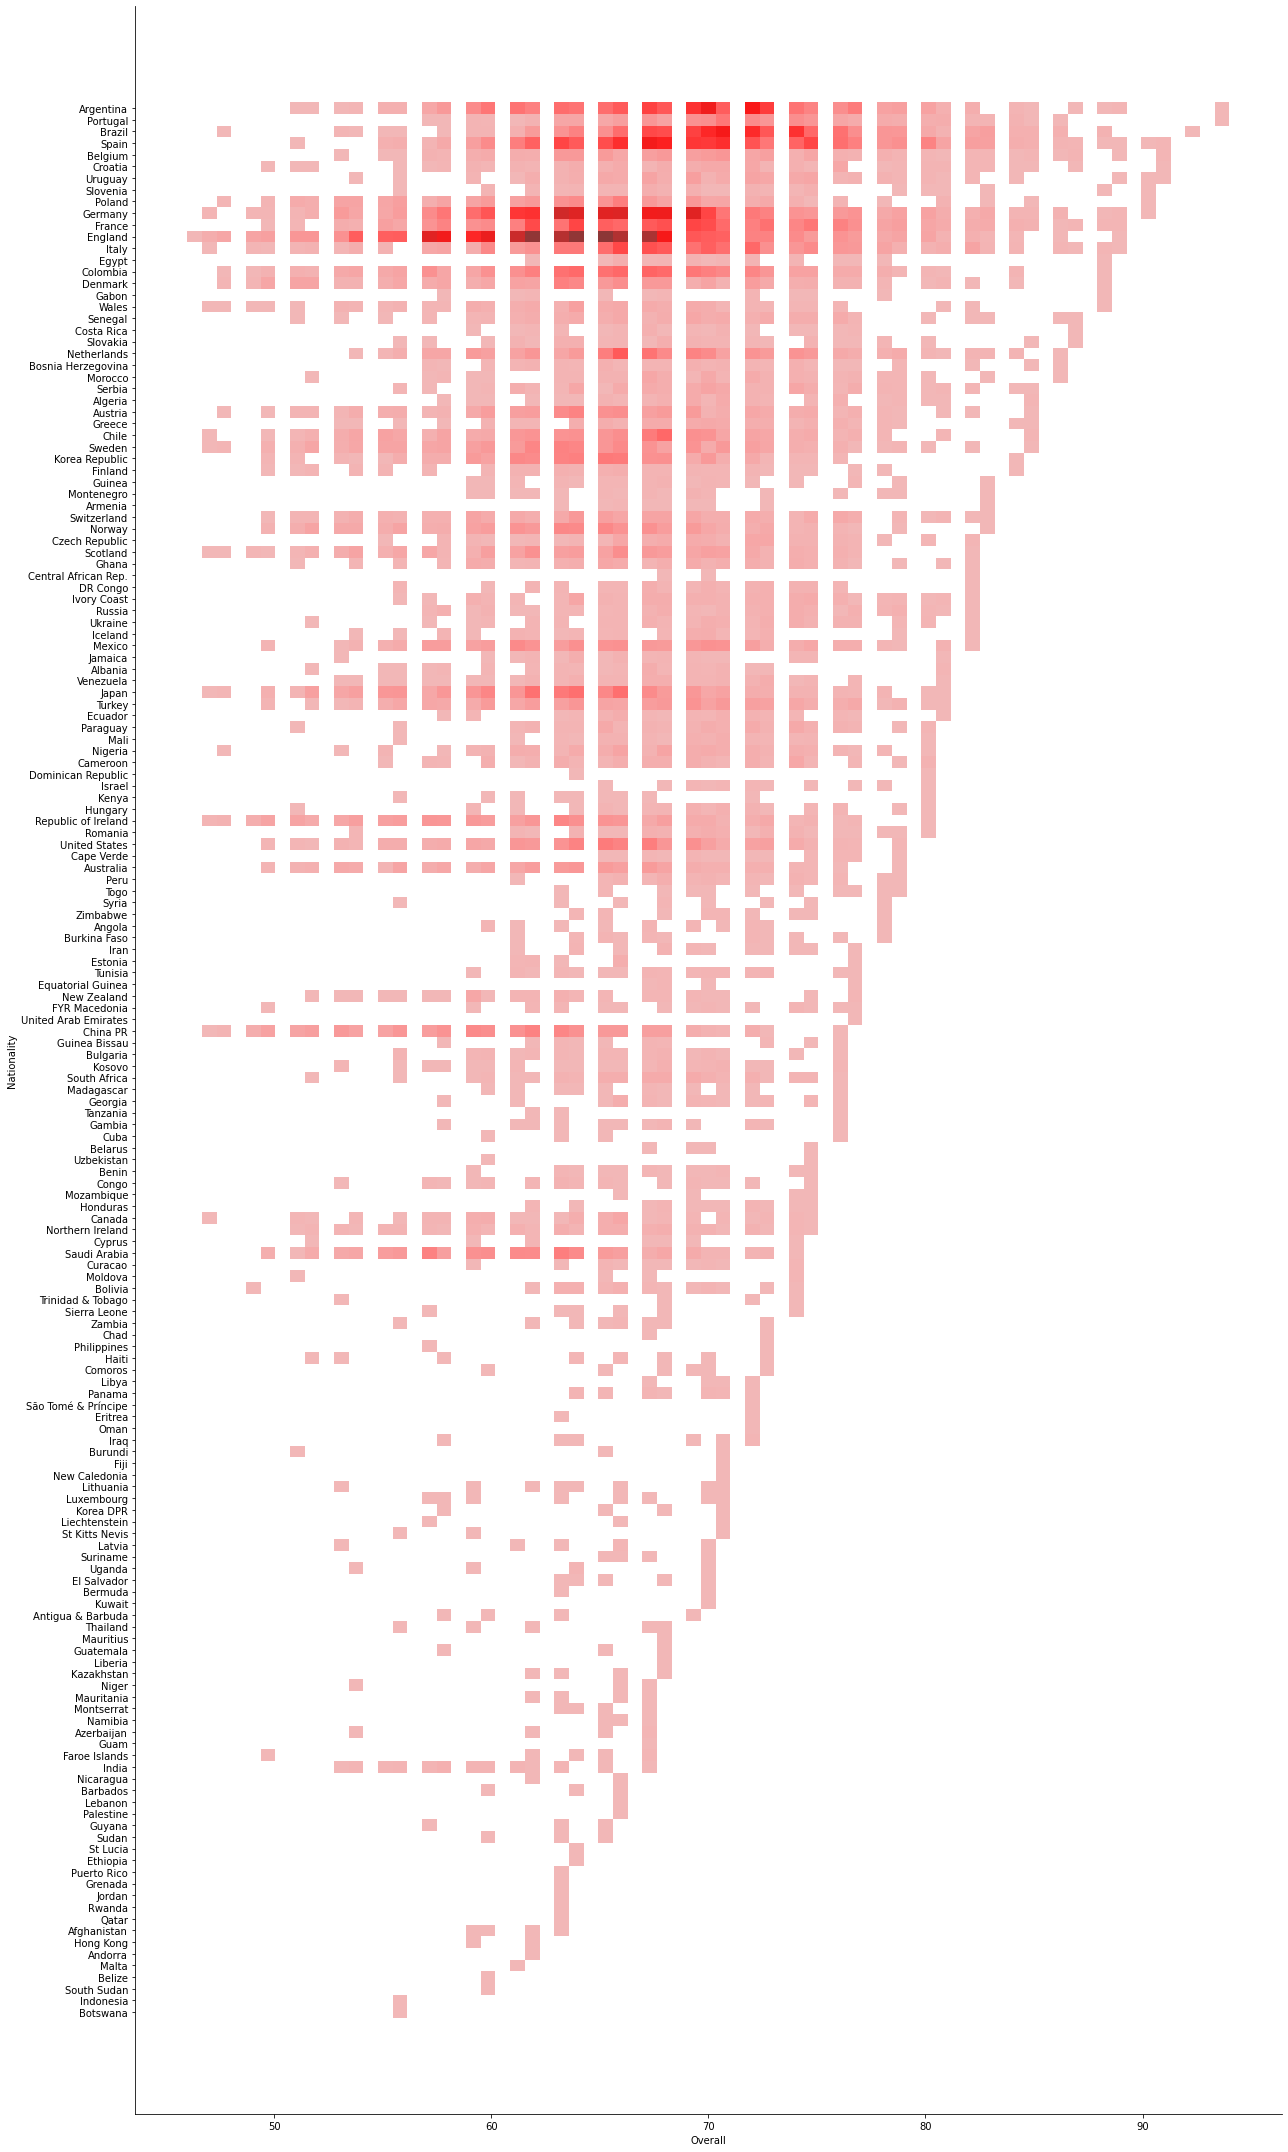

In [37]:
sns.displot(data=df_new, x="Overall", y="Nationality", height=30, aspect=0.6, color='#E60000')

Above we have plotted a heatmap to represent the count of players with a given Overall score from each country. For example, players with overall rating > 85 tend to be from Argentina, Portugal, Brazil, Spain, etc.

# Part 3
Features of players according to their position.

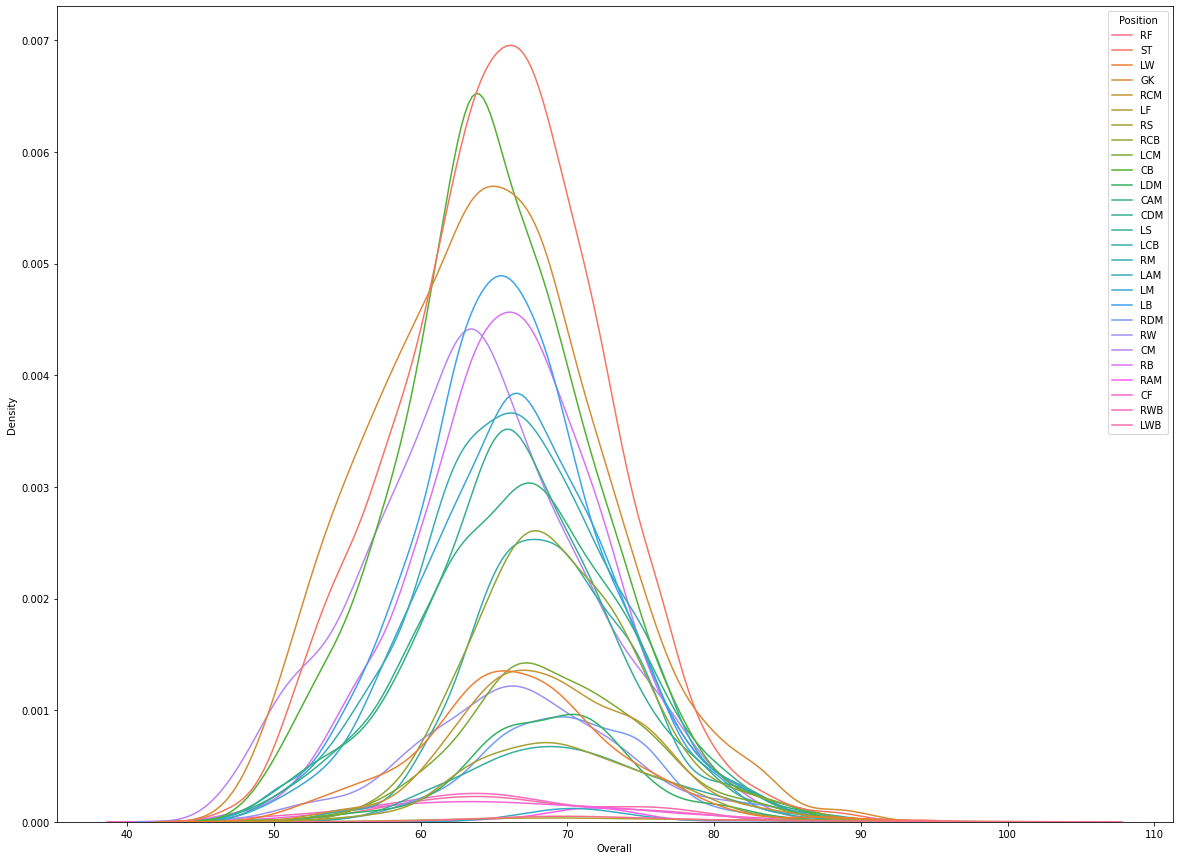

In [48]:
fig = plt.figure(figsize=(20,15))
sns.kdeplot(data=df_new, x='Overall', hue='Position')
plt.show()

Above is a Kernel Density Estimate (KDE) plot to represent the density of the overall rating of players based on their position. For example, more players in ST position tend to have higher densities in regard to Overall rating in range 70. In comparison, the peak density of players in RW position is considerably left-shifted.

In [66]:
x = "$123K"
int(x[1:-1])

123

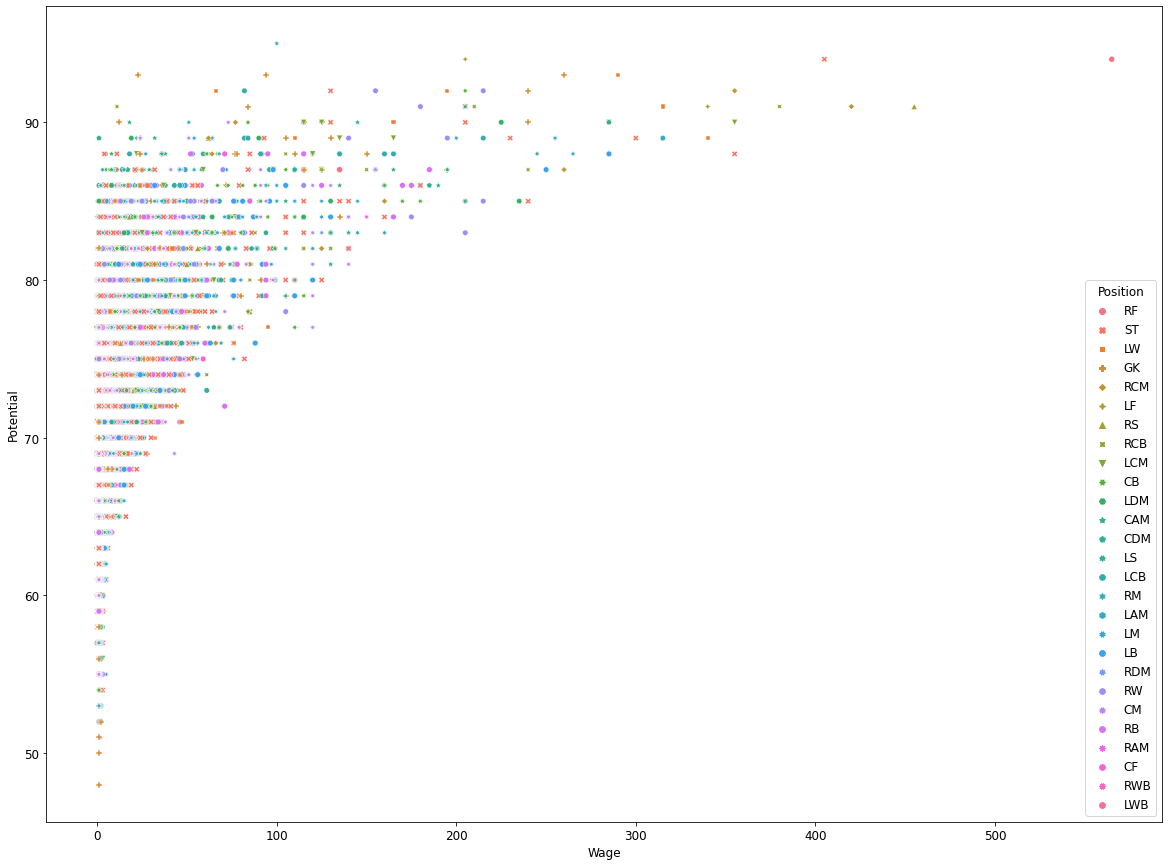

In [69]:
def correct_wage(w_str):
    if w_str[1:-1] == "":
        return 0
    return int(w_str[1:-1])

df_new = df.copy()
df_new['Wage'] = df_new[df_new['Wage'].notna()]['Wage'].apply(correct_wage)
plt.rcParams.update({'font.size': 12})

fig = plt.figure(figsize=(20,15))
sns.scatterplot(data=df_new, x='Wage', y='Potential', hue='Position', style='Position')
plt.show()

In the above plot, we can see the potential-wage graph for different positions.

# Part 4
Can you use visualisation techniques to find outliers?  Like Ronaldo and Messi.

## Answer
Yes, it is possible to find outliers using visualizations like boxplot. We demonstrate an example of finding outliers like L. Messi and C. Ronaldo using the ranged given by a box plot.

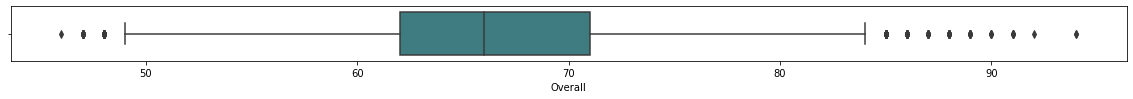

In [33]:
fig = plt.figure(figsize=(20,1))
sns.boxplot(data=df_new, x='Overall', palette="crest")
plt.show()

The points outside the thresholds indicated by the vertical "stopping" bars are outliers in this case.

### The outliers are:

In [181]:
ov_q1 = df_new.quantile(0.25)['Overall']
ov_q3 = df_new.quantile(0.75)['Overall']
iqr = ov_q3-ov_q1
upper_thresh = ov_q3 + 1.5 * iqr
lower_thresh = ov_q1 - 1.5 * iqr
upper_outliers = df[df['Overall'] > upper_thresh]
lower_outliers = df[df['Overall'] < lower_thresh]

In [182]:
upper_outliers

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,105,165153,K. Benzema,30,https://cdn.sofifa.org/players/4/19/165153.png,France,https://cdn.sofifa.org/flags/18.png,85,85,Real Madrid,...,79.0,47.0,15.0,12.0,13.0,11.0,5.0,5.0,7.0,€75.9M
106,106,164169,Filipe Luís,32,https://cdn.sofifa.org/players/4/19/164169.png,Brazil,https://cdn.sofifa.org/flags/54.png,85,85,Atlético Madrid,...,88.0,78.0,84.0,86.0,11.0,15.0,9.0,9.0,5.0,€44.1M
107,107,139720,V. Kompany,32,https://cdn.sofifa.org/players/4/19/139720.png,Belgium,https://cdn.sofifa.org/flags/7.png,85,85,Manchester City,...,81.0,87.0,85.0,84.0,10.0,9.0,5.0,8.0,6.0,€40.7M
108,108,120533,Pepe,35,https://cdn.sofifa.org/players/4/19/120533.png,Portugal,https://cdn.sofifa.org/flags/38.png,85,85,Beşiktaş JK,...,79.0,86.0,85.0,82.0,8.0,15.0,5.0,9.0,10.0,€17.1M


In [183]:
lower_outliers

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18154,18154,243204,M. Roberts,17,https://cdn.sofifa.org/players/4/19/243204.png,England,https://cdn.sofifa.org/flags/14.png,48,66,Northampton Town,...,47.0,23.0,25.0,26.0,9.0,13.0,12.0,15.0,9.0,€143K
18155,18155,242696,Liu Guobo,18,https://cdn.sofifa.org/players/4/19/242696.png,China PR,https://cdn.sofifa.org/flags/155.png,48,66,Beijing Sinobo Guoan FC,...,43.0,48.0,35.0,43.0,9.0,13.0,8.0,9.0,8.0,€170K
18156,18156,245533,J. Devine,18,https://cdn.sofifa.org/players/4/19/245533.png,England,https://cdn.sofifa.org/flags/14.png,48,60,Tranmere Rovers,...,46.0,49.0,59.0,57.0,9.0,9.0,6.0,11.0,12.0,€98K
18157,18157,246600,K. Taylor,17,https://cdn.sofifa.org/players/4/19/246600.png,England,https://cdn.sofifa.org/flags/14.png,48,63,Shrewsbury,...,42.0,45.0,45.0,42.0,10.0,5.0,8.0,7.0,8.0,€143K
18158,18158,244810,T. Lawal,18,https://cdn.sofifa.org/players/4/19/244810.png,Austria,https://cdn.sofifa.org/flags/4.png,48,69,LASK Linz,...,32.0,9.0,12.0,12.0,51.0,50.0,53.0,48.0,46.0,€147K
18159,18159,244561,L. Jagne,20,https://cdn.sofifa.org/players/4/19/244561.png,England,https://cdn.sofifa.org/flags/14.png,48,60,Morecambe,...,31.0,40.0,50.0,44.0,9.0,15.0,14.0,12.0,13.0,€98K
18160,18160,244817,D. Szczepaniak,18,https://cdn.sofifa.org/players/4/19/244817.png,Poland,https://cdn.sofifa.org/flags/37.png,48,63,Morecambe,...,31.0,5.0,11.0,10.0,50.0,45.0,49.0,50.0,49.0,€119K
18161,18161,244631,P. Wieliczko,18,https://cdn.sofifa.org/players/4/19/244631.png,Poland,https://cdn.sofifa.org/flags/37.png,48,58,Wisła Płock,...,36.0,50.0,37.0,44.0,12.0,9.0,6.0,6.0,7.0,€62K
18162,18162,243866,T. Gundelund,16,https://cdn.sofifa.org/players/4/19/243866.png,Denmark,https://cdn.sofifa.org/flags/13.png,48,66,Vejle Boldklub,...,34.0,43.0,52.0,49.0,6.0,10.0,12.0,11.0,6.0,€94K
18163,18163,242852,Wang Xin,20,https://cdn.sofifa.org/players/4/19/242852.png,China PR,https://cdn.sofifa.org/flags/155.png,48,58,Guangzhou R&F; FC,...,33.0,49.0,43.0,43.0,10.0,12.0,8.0,8.0,12.0,€94K


We can further refine the process and find outliers separately for each Club or Nationality. The reason being that, as shown in the heatmap above, a certain range of overall ratings tends to be from the players of specific nations/clubs.

In [58]:
fig = plt.figure(figsize=(40,500))
plt.rcParams.update({'font.size': 22})
sns.boxplot(data=df_new, x='Overall', y='Club')
plt.show()